In [1]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='Zo42ROBSrcpMpfBbswR7AWzrHC_F-SSCCYxCGrUwAm31',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'loan-donotdelete-pr-qbqt5hr9mvx4cu'
object_key = 'loan_prediction.csv'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [2]:
import pandas as pd
import numpy as np

In [3]:
df.shape

(614, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
df.Loan_Status.value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [6]:
df.drop(['Loan_ID'],axis=1,inplace=True)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [7]:
df.shape

(614, 12)

In [8]:
# checking the target column
df.Loan_Status.value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [9]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:

cat_df=df.select_dtypes('object')
cat_df.head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,Urban,Y
1,Male,Yes,1,Graduate,No,Rural,N
2,Male,Yes,0,Graduate,Yes,Urban,Y
3,Male,Yes,0,Not Graduate,No,Urban,Y
4,Male,No,0,Graduate,No,Urban,Y


In [11]:
# Replacing null values in cat_df by mode
cat_df = cat_df.fillna(cat_df.mode().iloc[0])
cat_df.head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,Urban,Y
1,Male,Yes,1,Graduate,No,Rural,N
2,Male,Yes,0,Graduate,Yes,Urban,Y
3,Male,Yes,0,Not Graduate,No,Urban,Y
4,Male,No,0,Graduate,No,Urban,Y


In [12]:
cat_df.isnull().sum()

Gender           0
Married          0
Dependents       0
Education        0
Self_Employed    0
Property_Area    0
Loan_Status      0
dtype: int64

In [13]:
# Categorical feature analysis
for column in cat_df.columns:                                # value_counts Loop
    print("\n" + column)
    print(cat_df[column].value_counts())


Gender
Male      502
Female    112
Name: Gender, dtype: int64

Married
Yes    401
No     213
Name: Married, dtype: int64

Dependents
0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

Education
Graduate        480
Not Graduate    134
Name: Education, dtype: int64

Self_Employed
No     532
Yes     82
Name: Self_Employed, dtype: int64

Property_Area
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

Loan_Status
Y    422
N    192
Name: Loan_Status, dtype: int64


In [14]:
cat_df['Dependents']=cat_df['Dependents'].replace("3+","3")
cat_df['Dependents'].value_counts()

0    360
1    102
2    101
3     51
Name: Dependents, dtype: int64

In [15]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
cat_df=cat_df.apply(le.fit_transform)
cat_df.head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,1,0,0,0,0,2,1
1,1,1,1,0,0,0,0
2,1,1,0,0,1,2,1
3,1,1,0,1,0,2,1
4,1,0,0,0,0,2,1


In [16]:
num_df=df.select_dtypes('float64','int64')
num_df.head()

,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0.0,NaN,360.0,1.0
1,1508.0,128.0,360.0,1.0
2,0.0,66.0,360.0,1.0
3,2358.0,120.0,360.0,1.0
4,0.0,141.0,360.0,1.0


In [17]:
num_df.isnull().sum()

CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
dtype: int64

In [18]:
num_df = num_df.fillna(num_df.median())
num_df.head()

,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0.0,128.0,360.0,1.0
1,1508.0,128.0,360.0,1.0
2,0.0,66.0,360.0,1.0
3,2358.0,120.0,360.0,1.0
4,0.0,141.0,360.0,1.0


In [19]:
df.ApplicantIncome.isnull().sum()

0

In [20]:
num1=num_df.join(df.ApplicantIncome)
num1.head()

,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,ApplicantIncome
0,0.0,128.0,360.0,1.0,5849
1,1508.0,128.0,360.0,1.0,4583
2,0.0,66.0,360.0,1.0,3000
3,2358.0,120.0,360.0,1.0,2583
4,0.0,141.0,360.0,1.0,6000


In [21]:
new_df=num1.join(cat_df)
new_df.head()

,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,ApplicantIncome,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,0.0,128.0,360.0,1.0,5849,1,0,0,0,0,2,1
1,1508.0,128.0,360.0,1.0,4583,1,1,1,0,0,0,0
2,0.0,66.0,360.0,1.0,3000,1,1,0,0,1,2,1
3,2358.0,120.0,360.0,1.0,2583,1,1,0,1,0,2,1
4,0.0,141.0,360.0,1.0,6000,1,0,0,0,0,2,1


In [22]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CoapplicantIncome  614 non-null    float64
 1   LoanAmount         614 non-null    float64
 2   Loan_Amount_Term   614 non-null    float64
 3   Credit_History     614 non-null    float64
 4   ApplicantIncome    614 non-null    int64  
 5   Gender             614 non-null    int64  
 6   Married            614 non-null    int64  
 7   Dependents         614 non-null    int64  
 8   Education          614 non-null    int64  
 9   Self_Employed      614 non-null    int64  
 10  Property_Area      614 non-null    int64  
 11  Loan_Status        614 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 57.7 KB


In [23]:
new_df.isnull().sum()

CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
ApplicantIncome      0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
Property_Area        0
Loan_Status          0
dtype: int64

In [24]:
new_df.describe()

,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,ApplicantIncome,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,1621.245798,145.752443,342.410423,0.855049,5403.459283,0.817590,0.653094,0.744300,0.218241,0.133550,1.037459,0.687296
std,2926.248369,84.107233,64.428629,0.352339,6109.041673,0.386497,0.476373,1.009623,0.413389,0.340446,0.787482,0.463973
min,0.000000,9.000000,12.000000,0.000000,150.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,100.250000,360.000000,1.000000,2877.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1188.500000,128.000000,360.000000,1.000000,3812.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,2297.250000,164.750000,360.000000,1.000000,5795.000000,1.000000,1.000000,1.000000,0.000000,0.000000,2.000000,1.000000
max,41667.000000,700.000000,480.000000,1.000000,81000.000000,1.000000,1.000000,3.000000,1.000000,1.000000,2.000000,1.000000


In [25]:
new_df.corr()['Loan_Status'].sort_values(ascending=False)

Loan_Status          1.000000
Credit_History       0.540556
Married              0.091478
Property_Area        0.032112
Gender               0.017987
Dependents           0.010118
Self_Employed       -0.003700
ApplicantIncome     -0.004710
Loan_Amount_Term    -0.022549
LoanAmount          -0.033214
CoapplicantIncome   -0.059187
Education           -0.085884
Name: Loan_Status, dtype: float64

In [26]:
new_df.corr()

,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,ApplicantIncome,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
CoapplicantIncome,1.000000,0.189218,-0.059383,0.011134,-0.116605,0.082912,0.075948,0.030430,-0.062290,-0.016100,0.010522,-0.059187
LoanAmount,0.189218,1.000000,0.036960,-0.000607,0.565181,0.106904,0.146546,0.163103,-0.168759,0.115100,-0.046632,-0.033214
Loan_Amount_Term,-0.059383,0.036960,1.000000,-0.004705,-0.046531,-0.074030,-0.100912,-0.103864,-0.073928,-0.033739,-0.076120,-0.022549
Credit_History,0.011134,-0.000607,-0.004705,1.000000,-0.018615,0.009170,0.010938,-0.040160,-0.073658,-0.001550,0.001963,0.540556
ApplicantIncome,-0.116605,0.565181,-0.046531,-0.018615,1.000000,0.058809,0.051708,0.118202,-0.140760,0.127180,-0.009500,-0.004710
Gender,0.082912,0.106904,-0.074030,0.009170,0.058809,1.000000,0.364569,0.172914,0.045364,-0.000525,-0.025752,0.017987
Married,0.075948,0.146546,-0.100912,0.010938,0.051708,0.364569,1.000000,0.334216,0.012304,0.004489,0.004257,0.091478
Dependents,0.030430,0.163103,-0.103864,-0.040160,0.118202,0.172914,0.334216,1.000000,0.055752,0.056798,-0.000244,0.010118
Education,-0.062290,-0.168759,-0.073928,-0.073658,-0.140760,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.065243,-0.085884
Self_Employed,-0.016100,0.115100,-0.033739,-0.001550,0.127180,-0.000525,0.004489,0.056798,-0.010383,1.000000,-0.030860,-0.003700


<AxesSubplot:>

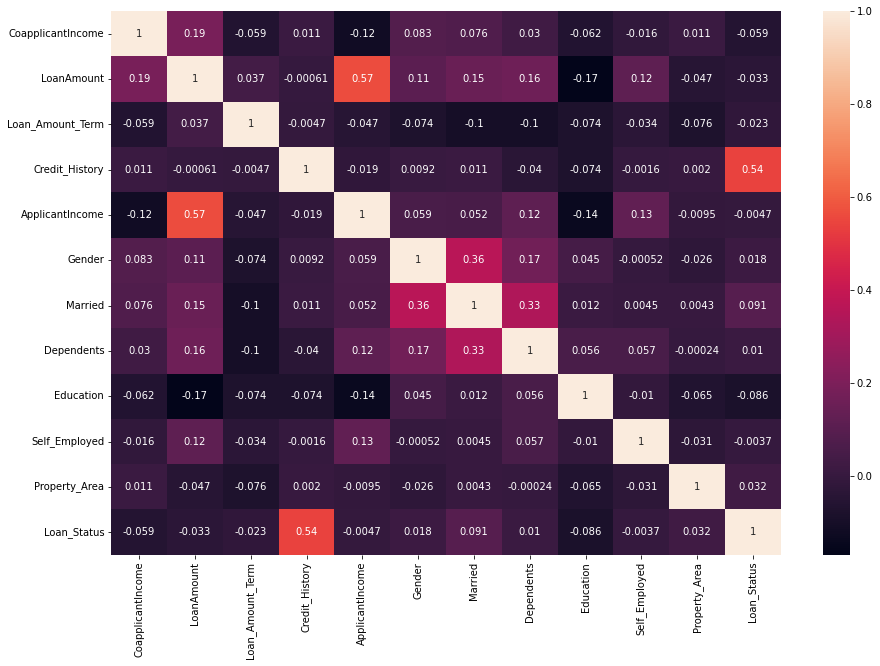

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,10))
sns.heatmap(new_df.corr(),annot=True)

In [28]:
new_df.head(3)

,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,ApplicantIncome,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,0.0,128.0,360.0,1.0,5849,1,0,0,0,0,2,1
1,1508.0,128.0,360.0,1.0,4583,1,1,1,0,0,0,0
2,0.0,66.0,360.0,1.0,3000,1,1,0,0,1,2,1


In [29]:
# independent and dependent variables

X=new_df.iloc[:,[5,6,9,4,1,3,10]]
X.head()

,Gender,Married,Self_Employed,ApplicantIncome,LoanAmount,Credit_History,Property_Area
0,1,0,0,5849,128.0,1.0,2
1,1,1,0,4583,128.0,1.0,0
2,1,1,1,3000,66.0,1.0,2
3,1,1,0,2583,120.0,1.0,2
4,1,0,0,6000,141.0,1.0,2


In [30]:
from sklearn.preprocessing import scale
scaled_X=pd.DataFrame (scale(X), columns=X.columns)
scaled_X.head()

,Gender,Married,Self_Employed,ApplicantIncome,LoanAmount,Credit_History,Property_Area
0,0.472343,-1.372089,-0.392601,0.072991,-0.211241,0.411733,1.223298
1,0.472343,0.728816,-0.392601,-0.134412,-0.211241,0.411733,-1.318513
2,0.472343,0.728816,2.547117,-0.393747,-0.948996,0.411733,1.223298
3,0.472343,0.728816,-0.392601,-0.462062,-0.306435,0.411733,1.223298
4,0.472343,-1.372089,-0.392601,0.097728,-0.056551,0.411733,1.223298


In [31]:
y=new_df.Loan_Status
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int64

In [32]:
new_df.Loan_Status.value_counts()
# 1 is loan approved
# 0 is not approved

1    422
0    192
Name: Loan_Status, dtype: int64

In [33]:
# train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(scaled_X,y,test_size=0.2,random_state=0)

In [34]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [35]:
from sklearn.linear_model import LogisticRegression
model5=LogisticRegression()
model5.fit(X_train, y_train)
y_predict5=model5.predict(X_test)
logi=accuracy_score(y_test, y_predict5)
logi

0.8292682926829268

In [36]:
pd.crosstab(y_test,y_predict5)

col_0,0,1
Loan_Status,,
0,14,19
1,2,88


In [37]:
print(classification_report(y_test, y_predict5))

              precision    recall  f1-score   support

           0       0.88      0.42      0.57        33
           1       0.82      0.98      0.89        90

    accuracy                           0.83       123
   macro avg       0.85      0.70      0.73       123
weighted avg       0.84      0.83      0.81       123



In [38]:
!pip install -U ibm-watson-machine-learning

In [39]:
from ibm_watson_machine_learning import APIClient
import json

In [40]:
wml_credentials = {
    "apikey":"0sPQ3zF5gEPdjLgQj0Ky1NrG80B1ZPvr-nUrCp7AyGBG",
    "url":"https://us-south.ml.cloud.ibm.com"
}

In [41]:
wml_client = APIClient(wml_credentials)
wml_client.spaces.list()

Note: 'limit' is not provided. Only first 50 records will be displayed if the number of records exceed 50
------------------------------------  -------------------  ------------------------
ID                                    NAME                 CREATED
85a9a851-3f62-412b-85ee-847c551dbb80  loan_1               2022-11-10T06:44:29.178Z
91a8c00d-4a5c-4256-8f1a-ded78911bb75  iris_demo            2022-10-13T14:26:52.468Z
1902bd6b-a15b-4101-9c2d-a6335cb36c45  iris_new             2022-10-11T09:52:20.074Z
f321e7d9-9a06-428c-ae12-9a4459dec59a  auto_ins             2022-10-09T05:07:03.933Z
7886afb1-8d6d-4170-87c1-5a6778d5bd38  iris                 2022-09-28T08:42:00.556Z
2b17fad2-0431-475f-ac40-855ef16669f2  fuel                 2022-08-03T18:49:40.620Z
1a640c8a-b339-435a-94b6-90cde535a1fd  kidney               2022-08-02T09:50:10.173Z
d8c1eebb-34c2-4f7c-a93e-359fad0fd688  Website              2022-08-01T16:02:27.972Z
d39710e0-1f00-4174-a6d5-bdb79081cefe  insu deploy          2022-07-02T0

In [42]:
SPACE_ID= "1902bd6b-a15b-4101-9c2d-a6335cb36c45"

In [43]:
wml_client.set.default_space(SPACE_ID)

'SUCCESS'

In [44]:
import sklearn
sklearn.__version__

'1.0.2'

In [53]:
MODEL_NAME = 'loan_1'
DEPLOYMENT_NAME = 'iris_new'
DEMO_MODEL = model5

In [54]:
# Set Python Version
software_spec_uid = wml_client.software_specifications.get_id_by_name('runtime-22.1-py3.9')

In [55]:
# Setup model meta
model_props = {
    wml_client.repository.ModelMetaNames.NAME: MODEL_NAME, 
    wml_client.repository.ModelMetaNames.TYPE: 'scikit-learn_1.0', 
    wml_client.repository.ModelMetaNames.SOFTWARE_SPEC_UID: software_spec_uid 
}

In [56]:
#Save model
model_details = wml_client.repository.store_model(
    model=DEMO_MODEL, 
    meta_props=model_props, 
    training_data=X_train, 
    training_target=y_train
)

In [57]:
model_details

{'entity': {'hybrid_pipeline_software_specs': [],
  'label_column': 'Loan_Status',
  'schemas': {'input': [{'fields': [{'name': 'Gender', 'type': 'float64'},
      {'name': 'Married', 'type': 'float64'},
      {'name': 'Self_Employed', 'type': 'float64'},
      {'name': 'ApplicantIncome', 'type': 'float64'},
      {'name': 'LoanAmount', 'type': 'float64'},
      {'name': 'Credit_History', 'type': 'float64'},
      {'name': 'Property_Area', 'type': 'float64'}],
     'id': '1',
     'type': 'struct'}],
   'output': []},
  'software_spec': {'id': '12b83a17-24d8-5082-900f-0ab31fbfd3cb',
   'name': 'runtime-22.1-py3.9'},
  'type': 'scikit-learn_1.0'},
 'metadata': {'created_at': '2022-11-11T08:36:25.207Z',
  'id': 'e8e97f38-7ecb-4f5a-a946-be00c135a322',
  'modified_at': '2022-11-11T08:36:28.408Z',
  'name': 'loan_1',
  'owner': 'IBMid-666001ZVRT',
  'resource_key': '0c0aaac2-e2b6-4ca8-8f5b-d1d3db71e687',
  'space_id': '1902bd6b-a15b-4101-9c2d-a6335cb36c45'},
 'system': {'warnings': []}}

In [58]:
model_id = wml_client.repository.get_model_id(model_details)
model_id

'e8e97f38-7ecb-4f5a-a946-be00c135a322'

In [59]:
# Set meta
deployment_props = {
    wml_client.deployments.ConfigurationMetaNames.NAME:DEPLOYMENT_NAME, 
    wml_client.deployments.ConfigurationMetaNames.ONLINE: {}
}

In [60]:
# Deploy
deployment = wml_client.deployments.create(
    artifact_uid=model_id, 
    meta_props=deployment_props 
)



#######################################################################################

Synchronous deployment creation for uid: 'e8e97f38-7ecb-4f5a-a946-be00c135a322' started

#######################################################################################


initializing
Note: online_url is deprecated and will be removed in a future release. Use serving_urls instead.

ready


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='27777c70-3302-4ca9-96d5-8cdab969a223'
------------------------------------------------------------------------------------------------


